### Read in results YAML from metacoder and do some visualization

In [1]:
import yaml

results_yaml_file = "../results/literature_mcp_eval_results_20250904.yaml"
with open(results_yaml_file, 'r') as file:
    metacoder_results = yaml.safe_load(file)


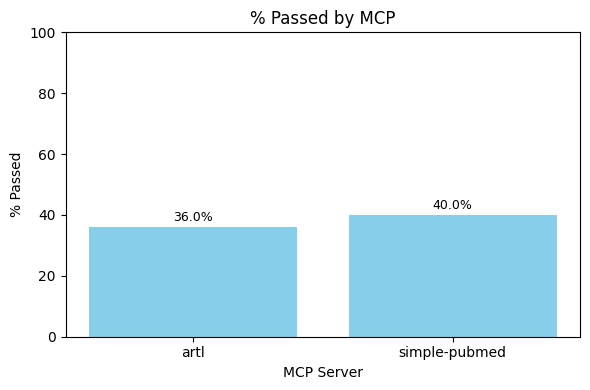

In [2]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt

# Load YAML
with open(results_yaml_file, 'r') as file:
    metacoder_results = yaml.safe_load(file)

# Convert YAML results to DataFrame
df = pd.DataFrame(metacoder_results['results'])

# Expand rows so each server gets its own row
df = df.explode('servers')

# Use the server as MCP identifier
df['MCP'] = df['servers']

# Calculate % passed for each MCP
percent_passed = (
    df.groupby('MCP')['passed']
    .mean()
    .reset_index()
)
percent_passed['percent_passed'] = percent_passed['passed'] * 100

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(percent_passed['MCP'], percent_passed['percent_passed'], color='skyblue')
plt.ylabel('% Passed')
plt.xlabel('MCP Server')
plt.title('% Passed by MCP')
plt.ylim(0, 100)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


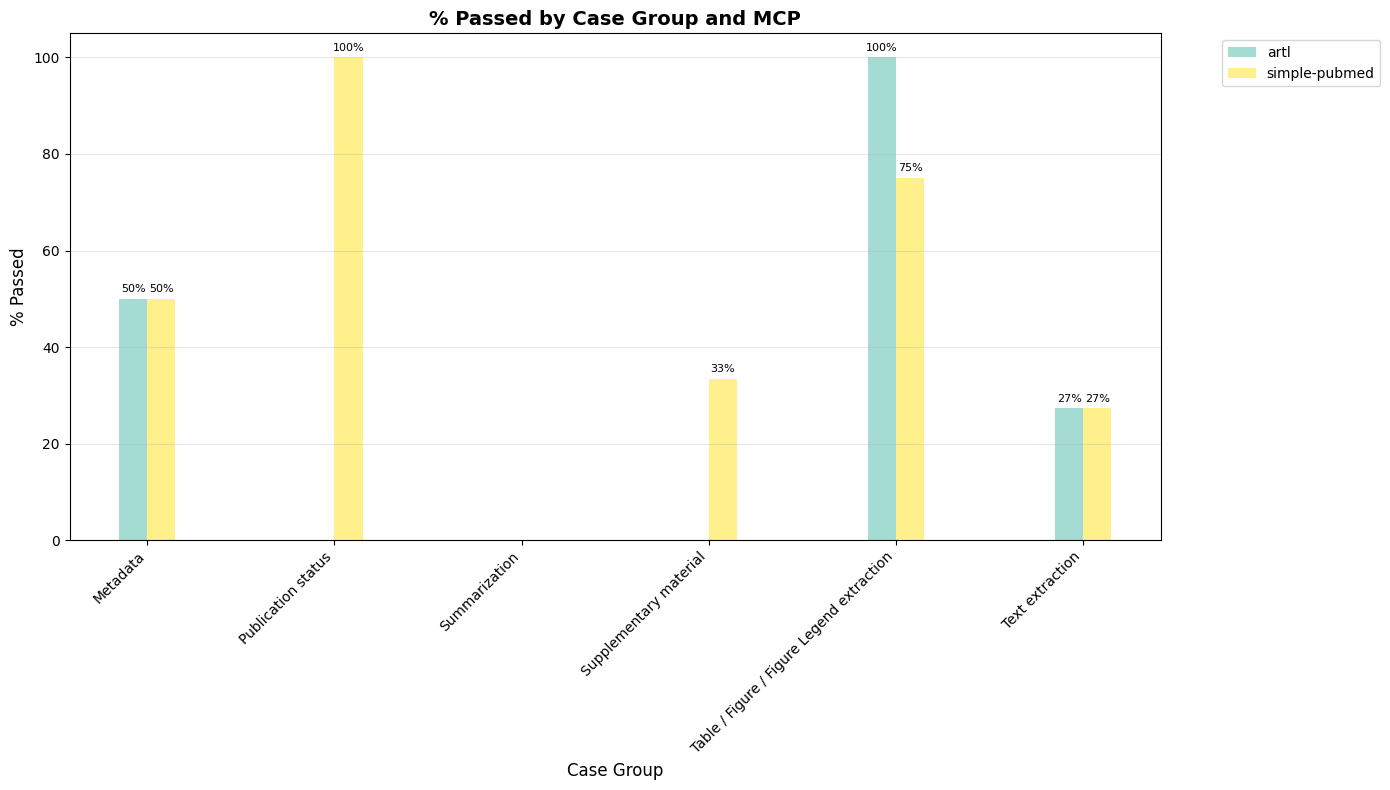


Summary Table: % Passed by Case Group and MCP
MCP                                         artl  simple-pubmed
case_group                                                     
Metadata                                    50.0           50.0
Publication status                           0.0          100.0
Summarization                                0.0            0.0
Supplementary material                       0.0           33.3
Table / Figure / Figure Legend extraction  100.0           75.0
Text extraction                             27.3           27.3


In [3]:
# Grouped bar plot: % passed by case_group for each MCP
import numpy as np

# Calculate % passed by case_group and MCP
grouped_stats = (
    df.groupby(['case_group', 'MCP'])['passed']
    .mean()
    .reset_index()
)
grouped_stats['percent_passed'] = grouped_stats['passed'] * 100

# Pivot to get MCPs as columns and case_groups as rows
pivot_data = grouped_stats.pivot(index='case_group', columns='MCP', values='percent_passed')
pivot_data = pivot_data.fillna(0)  # Fill missing combinations with 0

# Create grouped bar plot
fig, ax = plt.subplots(figsize=(14, 8))

# Number of groups and bars
n_groups = len(pivot_data.index)
n_bars = len(pivot_data.columns)
bar_width = 0.15
index = np.arange(n_groups)

# Colors for each MCP
colors = plt.cm.Set3(np.linspace(0, 1, n_bars))

# Create bars for each MCP
for i, (mcp, color) in enumerate(zip(pivot_data.columns, colors)):
    bars = ax.bar(index + i * bar_width, pivot_data[mcp], bar_width, 
                  label=mcp, color=color, alpha=0.8)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only show label if there's a value
            ax.text(bar.get_x() + bar.get_width()/2, height + 1,
                   f'{height:.0f}%', ha='center', va='bottom', fontsize=8)

# Customize the plot
ax.set_xlabel('Case Group', fontsize=12)
ax.set_ylabel('% Passed', fontsize=12)
ax.set_title('% Passed by Case Group and MCP', fontsize=14, fontweight='bold')
ax.set_xticks(index + bar_width * (n_bars - 1) / 2)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')
ax.set_ylim(0, 105)  # Leave room for labels
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary Table: % Passed by Case Group and MCP")
print("=" * 60)
print(pivot_data.round(1))